<a href="https://colab.research.google.com/github/Drozeler/Machine-Learning/blob/main/HousePricePredictionUpdatedWithOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Drop ID

In [ ]:
train_ID = df['Id']
df.drop("Id", axis = 1, inplace = True)

NaN

In [ ]:
nancatcolumn = df[df.select_dtypes(include='object').columns].isna().sum()
nancatcolumn = nancatcolumn[nancatcolumn > 0].index.tolist()
df[nancatcolumn] = df[nancatcolumn].fillna('None')

In [ ]:
nannumcolumn = df[df.select_dtypes(include=['float64', 'int64']).columns].isna().sum()
nannumcolumn = nannumcolumn[nannumcolumn > 0].index.tolist()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[nannumcolumn] = imputer.fit_transform(df[nannumcolumn])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Checking Correlation

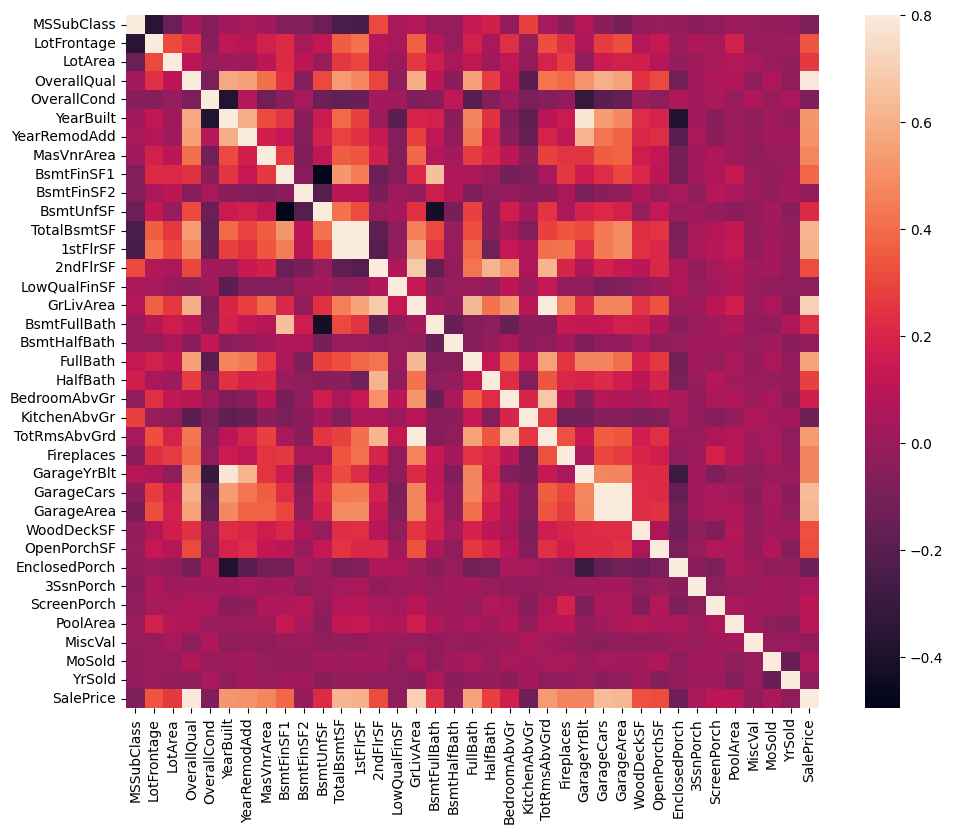

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

corrmat = numerical_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

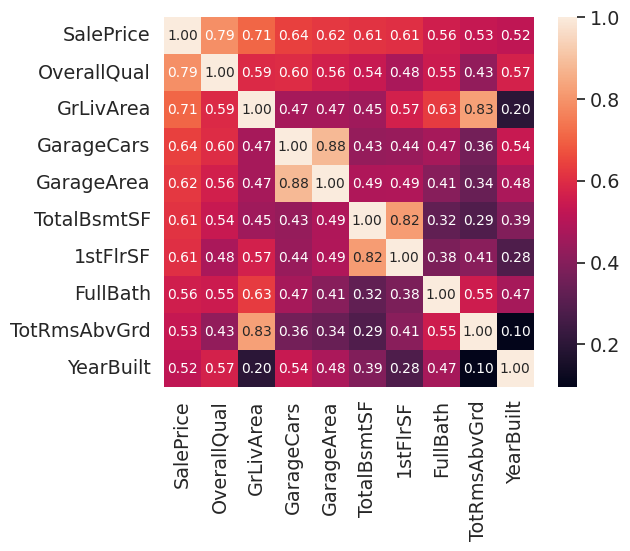

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


Encoding Object Type Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

dfcatcolumns = df.select_dtypes(include='object').columns.tolist()
encode = LabelEncoder()
for col in dfcatcolumns:
  df[col] = encode.fit_transform(df[col])

Train df and dfor

In [ ]:
X = df[most_corr['Most Correlated Features']]
y = df['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

Linear Regression

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_predlr = model.predict(X_test_scaled)

In [ ]:
mse_lr = mean_squared_error(y_test, y_predlr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_predlr)
mae_lr = mean_absolute_error(y_test, y_predlr)

print('Mean Squared Error (MSE):', mse_lr)
print('Root Mean Squared Error (RMSE):', rmse_lr)
print('R-squared (R2):', r2_lr)
print('Mean Absolute Error (MAE):', mae_lr)

Mean Squared Error (MSE): 4.681887592015208e-21
Root Mean Squared Error (RMSE): 6.84243201794158e-11
R-squared (R2): 1.0
Mean Absolute Error (MAE): 5.461951743250024e-11


In [ ]:
print(y_predlr)

[200624. 133000. 110000. 192000.  88000.  85000. 282922. 141000. 745000.
 148800. 208900. 136905. 225000. 123000. 119200. 145000. 190000. 123600.
 149350. 155000. 166000. 144500. 110000. 174000. 185000. 168000. 177500.
  84500. 320000. 118500. 110000. 213000. 156000. 250000. 372500. 175000.
 277500. 112500. 263000. 325000. 243000. 130000. 164990. 280000. 403000.
 119000. 125000. 128200. 172500.  84900. 412500. 156000. 167900. 100000.
 275000. 123000. 132000. 239900. 139000. 115000. 137500. 135000. 134450.
 180500. 193500. 156500. 132000. 224500. 139000. 225000. 188500. 118000.
  82000. 392000. 112000. 248900. 134500.  79500. 320000. 158000. 140000.
 136500. 107500. 145000. 200500. 185000. 105000. 202665. 186000. 136000.
 200500. 190000. 187500. 200000. 172500. 157000. 213000. 185000. 124500.
 162900. 260000. 198500. 120000. 159500. 105900. 260000. 143000. 106500.
 178900. 127000.  90350. 118500. 190000. 119900. 183900. 155000. 386250.
 133000. 193500. 270000. 141000. 146000. 128500. 17

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_preddt = dt_regressor.predict(X_test)

In [ ]:
mse_dt = mean_squared_error(y_test, y_preddt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_preddt)
mae_dt = mean_absolute_error(y_test, y_preddt)

print('Mean Squared Error (MSE):', mse_dt)
print('Root Mean Squared Error (RMSE):', rmse_dt)
print('R-squared (R2):', r2_dt)
print('Mean Absolute Error (MAE):', mae_dt)

Mean Squared Error (MSE): 39658197.319634706
Root Mean Squared Error (RMSE): 6297.4754719359335
R-squared (R2): 0.9941584552485444
Mean Absolute Error (MAE): 904.3196347031964


In [ ]:
print(y_preddt)

[201000. 133000. 110000. 192000.  88000.  85000. 284000. 141500. 625000.
 149000. 208900. 136900. 225000. 123000. 119000. 145000. 190000. 123500.
 149500. 154900. 166000. 144152. 110000. 174000. 185000. 168000. 178000.
  84500. 319000. 118858. 110000. 213500. 156000. 250000. 372402. 175000.
 277000. 112500. 263435. 328000. 242000. 130000. 165000. 279500. 402000.
 118964. 125000. 128000. 172500.  85000. 410000. 156000. 168000. 100000.
 274900. 122500. 132000. 240000. 139000. 115000. 137500. 135000. 134500.
 180500. 193000. 157000. 132000. 224900. 139000. 225000. 189000. 118000.
  82000. 394617. 112000. 248328. 134500.  79900. 317000. 158000. 140000.
 136500. 107500. 144900. 200000. 185000. 105000. 202500. 185850. 135900.
 200000. 190000. 187500. 200000. 172500. 157000. 213000. 185000. 124500.
 163000. 260400. 197900. 120000. 159500. 106000. 261500. 143000. 106500.
 179000. 127000.  89500. 118858. 190000. 119900. 184000. 155000. 383970.
 133000. 193000. 270000. 141000. 146000. 128500. 17

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_predrf = rf_regressor.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_predrf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_predrf)
mae_rf = mean_absolute_error(y_test, y_predrf)

print('Mean Squared Error (MSE):', mse_rf)
print('Root Mean Squared Error (RMSE):', rmse_rf)
print('R-squared (R2):', r2_rf)
print('Mean Absolute Error (MAE):', mae_rf)

Mean Squared Error (MSE): 16633470.156916443
Root Mean Squared Error (RMSE): 4078.4151525949933
R-squared (R2): 0.9975499350232563
Mean Absolute Error (MAE): 595.2563926940643


In [ ]:
print(y_predrf)

[200554.   132973.   109988.   192200.    87969.    85046.   283624.79
 141127.   694612.18 148960.   208733.   136940.   225018.   123036.
 118985.   145007.5  189959.   123729.   149537.   155003.45 165684.
 144357.74 110012.5  173905.7  184985.5  167911.8  177314.17  84586.
 318970.49 118752.06 110061.   213045.   155960.07 250069.04 373326.48
 175042.17 276972.53 112125.   262818.58 325716.08 242559.   129973.
 164894.9  280177.32 402614.37 118956.44 124975.   128014.   172495.4
  85007.   406626.86 156080.72 167879.2  100046.   275011.35 122943.
 131954.5  239630.98 138953.   114959.16 137507.5  134999.   134429.32
 180507.04 192860.   156861.78 131969.5  224908.8  138991.92 225022.
 188625.   118000.38  81739.   392742.78 111935.   248559.68 134452.8
  79580.   318995.46 157957.   139994.   136547.   107338.   144995.
 200019.   185073.5  105196.   202622.   185756.5  135834.   200111.
 189983.5  187557.   200052.   172417.35 157108.84 213022.   184994.5
 124529.   162938.4  2602

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_predgb = gb_regressor.predict(X_test)

In [ ]:
mse_gb = mean_squared_error(y_test, y_predgb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_predgb)
mae_gb = mean_absolute_error(y_test, y_predgb)

print('Mean Squared Error (MSE):', mse_gb)
print('Root Mean Squared Error (RMSE):', rmse_gb)
print('R-squared (R2):', r2_gb)
print('Mean Absolute Error (MAE):', mae_gb)

Mean Squared Error (MSE): 1711658.5200048576
Root Mean Squared Error (RMSE): 1308.3036803452237
R-squared (R2): 0.9997478773489569
Mean Absolute Error (MAE): 669.4033697863191


In [ ]:
print(y_predgb)

[200729.82377886 133862.04117796 110675.36588714 192634.5796925
  87339.58997931  85145.06998968 285086.53556386 141332.23268288
 754151.41143064 149511.46426738 209128.91210805 137096.66084275
 225004.39472027 123010.9959231  119577.49580119 145689.25407374
 190069.11802313 123342.94475982 149603.52932618 154966.44112737
 166815.32696825 143341.92397236 110823.68719354 173993.40592269
 184485.37362892 167533.59718837 178003.99505445  84908.99115479
 319806.96500903 119614.33037334 111111.78530557 213106.35741094
 155095.37796325 250149.81116644 370157.47316975 175068.65605349
 276087.78333575 112404.75291082 264650.95910991 324880.91009647
 242393.11026921 129780.31812957 165032.93484091 279437.48425891
 401877.20452441 119557.23524608 125174.03007744 127944.06911638
 172532.76825603  85039.23345426 410425.7430405  155128.68922514
 167651.15121362 100003.93573467 275921.84073205 123025.62526042
 131623.82435627 239992.54976647 139426.49114473 113662.09351379
 136937.36316297 135097.12

SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

svr_regressor = make_pipeline(StandardScaler(), SVR())
svr_regressor.fit(X_train, y_train)
y_predsv = svr_regressor.predict(X_test)

In [ ]:
mse_sv = mean_squared_error(y_test, y_predsv)
rmse_sv = np.sqrt(mse_sv)
r2_sv = r2_score(y_test, y_predsv)
mae_sv = mean_absolute_error(y_test, y_predsv)

print('Mean Squared Error (MSE):', mse_sv)
print('Root Mean Squared Error (RMSE):', rmse_sv)
print('R-squared (R2):', r2_sv)
print('Mean Absolute Error (MAE):', mae_sv)

Mean Squared Error (MSE): 7126351929.072734
Root Mean Squared Error (RMSE): 84417.7228375223
R-squared (R2): -0.04969228360992051
Mean Absolute Error (MAE): 56370.136991210275


In [ ]:
print(y_predsv)

[163053.73948623 162860.98478324 162819.09248774 163159.9877699
 162869.22275517 162854.44214852 163174.68050844 162879.44041409
 163026.5711269  163013.1437062  163131.78227749 163087.11314681
 163165.70869863 162828.71910739 162846.78746269 162885.2852685
 163149.42368613 162908.526438   162879.36732219 162935.81356723
 163003.40634979 162929.42113141 162863.10432059 163034.02701338
 163106.9241262  162996.75163682 163046.53554457 162919.72704235
 163156.38541744 162822.75559454 163067.09922984 163131.74348896
 162908.03528238 163165.67273366 163116.37328107 163067.13130553
 163171.15076448 162865.99639513 163175.90196166 163157.82691772
 163103.11314577 162923.87447739 163117.79911724 163155.30899628
 163117.58908223 163038.77169453 162901.40131396 162834.46120851
 163074.59927073 162882.03315723 163103.42060984 162906.87019242
 163093.54725798 162888.49661089 163160.24917557 162981.89748987
 162951.18682917 163157.04498225 162892.79005058 162815.10726214
 162907.61533244 162835.381

In [ ]:
import pickle

pickle.dump(rf_regressor, open('random_forest_model.pkl', 'wb'))
pickle.dump(gb_regressor, open('gradient_boost_model.pkl', 'wb'))
pickle.dump(model, open('linear_regression_model.pkl', 'wb'))